# Predicting determinants of crimes in US Communities 

This project uses the communities dataset from UCI learning repository to explain factors responsible for crimes in many US communities.  The data contains 2215 instances with 147 records.  We have carefully selected about 20 variables which we feel can trigger crimes in the communities.  

Some variables are constructed in different ways to essentially measure the same thing.  For instance, reporting number of people under poverty and percentage of people living under poverty, the 2 variables essentially are quantifying thesame thing, in such situations, we stick to only 1 of the variables, preferably percentage measures.

### Importing the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Import the dataset

In [2]:
data = pd.read_csv("/content/drive/MyDrive/Crime Analytics/crimenew.csv")
data.head()

,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t29,pctWWage,pctWSocSec,pctWPubAsst,perCapInc,...,MalePctNevMarr,TotalPctDiv,PctKidsBornNeverMar,PctImmigRec5,PctPersDenseHous,MedRentPctHousInc,PctSameCity85,PopDens,ViolentCrimesPerPop,nonViolPerPop
0,2.57,0.18,98.48,0.84,1.66,24.90,77.02,35.90,5.43,16201,...,31.89,8.98,1.12,21.36,1.70,26.7,88.42,4109.8,132.87,1992.98
1,2.40,6.50,91.93,1.13,1.17,27.58,79.77,27.82,6.00,15138,...,33.99,11.62,2.77,8.91,1.39,25.6,76.06,4062.2,216.85,3080.55
2,2.92,1.41,96.01,1.76,3.61,27.30,89.65,15.44,3.02,17642,...,28.40,7.26,1.20,11.08,1.48,28.7,69.42,1377.3,130.22,1674.21
3,2.59,1.58,90.57,7.00,5.08,23.23,81.68,31.65,2.30,19643,...,30.09,6.99,0.84,13.98,1.77,23.2,89.03,6673.6,155.14,1725.21
4,2.38,0.42,99.19,0.24,0.52,23.42,66.11,44.02,6.67,10246,...,26.73,11.83,1.92,14.67,1.02,24.8,88.99,3421.4,82.95,1539.17


In [3]:
data.tail()

,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t29,pctWWage,pctWSocSec,pctWPubAsst,perCapInc,...,MalePctNevMarr,TotalPctDiv,PctKidsBornNeverMar,PctImmigRec5,PctPersDenseHous,MedRentPctHousInc,PctSameCity85,PopDens,ViolentCrimesPerPop,nonViolPerPop
2210,2.76,0.82,97.60,1.26,1.86,24.96,78.41,30.55,2.55,26895,...,31.60,6.86,0.46,13.59,0.64,26.6,83.14,1716.6,?,3813.53
2211,2.50,7.58,81.61,1.79,16.27,30.11,74.42,31.61,9.08,14715,...,39.17,10.84,5.99,21.27,4.15,24.8,82.73,5462.9,728.32,6652.17
2212,2.72,6.57,86.75,3.94,7.69,28.95,83.63,23.55,3.98,19300,...,34.16,9.92,2.97,30.54,4.06,26.5,76.88,1502.8,265.95,5201.39
2213,2.63,2.13,93.26,3.49,4.42,22.08,80.52,28.24,2.38,46070,...,28.94,7.73,1.03,32.92,1.34,24.8,78.39,1178.4,52.25,2326.01
2214,2.65,1.52,96.79,1.03,2.31,24.75,82.47,28.50,3.14,19099,...,30.76,9.40,1.65,12.52,1.00,26.1,83.52,2135.7,136.48,5457.1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2215 entries, 0 to 2214
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   householdsize        2215 non-null   float64
 1   racepctblack         2215 non-null   float64
 2   racePctWhite         2215 non-null   float64
 3   racePctAsian         2215 non-null   float64
 4   racePctHisp          2215 non-null   float64
 5   agePct12t29          2215 non-null   float64
 6   pctWWage             2215 non-null   float64
 7   pctWSocSec           2215 non-null   float64
 8   pctWPubAsst          2215 non-null   float64
 9   perCapInc            2215 non-null   int64  
 10  whitePerCap          2215 non-null   int64  
 11  blackPerCap          2215 non-null   int64  
 12  indianPerCap         2215 non-null   int64  
 13  AsianPerCap          2215 non-null   int64  
 14  OtherPerCap          2214 non-null   float64
 15  HispPerCap           2215 non-null   i

### Convert Violent and nonViolent Crimes to int

In [5]:
data[['ViolentCrimesPerPop','nonViolPerPop']] = data[['ViolentCrimesPerPop','nonViolPerPop']].apply(pd.to_numeric,errors='coerce')

In [6]:
data.isnull().sum()

householdsize            0
racepctblack             0
racePctWhite             0
racePctAsian             0
racePctHisp              0
agePct12t29              0
pctWWage                 0
pctWSocSec               0
pctWPubAsst              0
perCapInc                0
whitePerCap              0
blackPerCap              0
indianPerCap             0
AsianPerCap              0
OtherPerCap              1
HispPerCap               0
PctPopUnderPov           0
PctNotHSGrad             0
PctUnemployed            0
MalePctNevMarr           0
TotalPctDiv              0
PctKidsBornNeverMar      0
PctImmigRec5             0
PctPersDenseHous         0
MedRentPctHousInc        0
PctSameCity85            0
PopDens                  0
ViolentCrimesPerPop    221
nonViolPerPop           97
dtype: int64

In [7]:
# Remove missing values

df = data.dropna()

In [8]:
df.isnull().sum()

householdsize          0
racepctblack           0
racePctWhite           0
racePctAsian           0
racePctHisp            0
agePct12t29            0
pctWWage               0
pctWSocSec             0
pctWPubAsst            0
perCapInc              0
whitePerCap            0
blackPerCap            0
indianPerCap           0
AsianPerCap            0
OtherPerCap            0
HispPerCap             0
PctPopUnderPov         0
PctNotHSGrad           0
PctUnemployed          0
MalePctNevMarr         0
TotalPctDiv            0
PctKidsBornNeverMar    0
PctImmigRec5           0
PctPersDenseHous       0
MedRentPctHousInc      0
PctSameCity85          0
PopDens                0
ViolentCrimesPerPop    0
nonViolPerPop          0
dtype: int64

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
householdsize,1901.0,2.712167,0.347454,1.60,2.50,2.66,2.86,5.28
racepctblack,1901.0,9.358958,13.935927,0.00,0.93,3.04,11.43,96.67
racePctWhite,1901.0,83.466423,16.357057,2.68,75.77,89.61,95.96,99.63
racePctAsian,1901.0,2.822799,4.738172,0.06,0.63,1.27,2.88,57.46
racePctHisp,1901.0,8.718985,15.449951,0.12,0.95,2.43,8.92,95.29
agePct12t29,1901.0,27.601094,6.153583,9.38,24.37,26.78,29.20,70.51
pctWWage,1901.0,78.189863,7.841396,31.68,73.45,78.55,83.76,96.62
pctWSocSec,1901.0,26.577880,8.252830,4.81,20.90,26.66,31.72,76.39
pctWPubAsst,1901.0,6.755381,4.482357,0.50,3.36,5.62,9.09,26.92
perCapInc,1901.0,15604.296160,6289.037905,5237.00,11563.00,14087.00,17910.00,63302.00


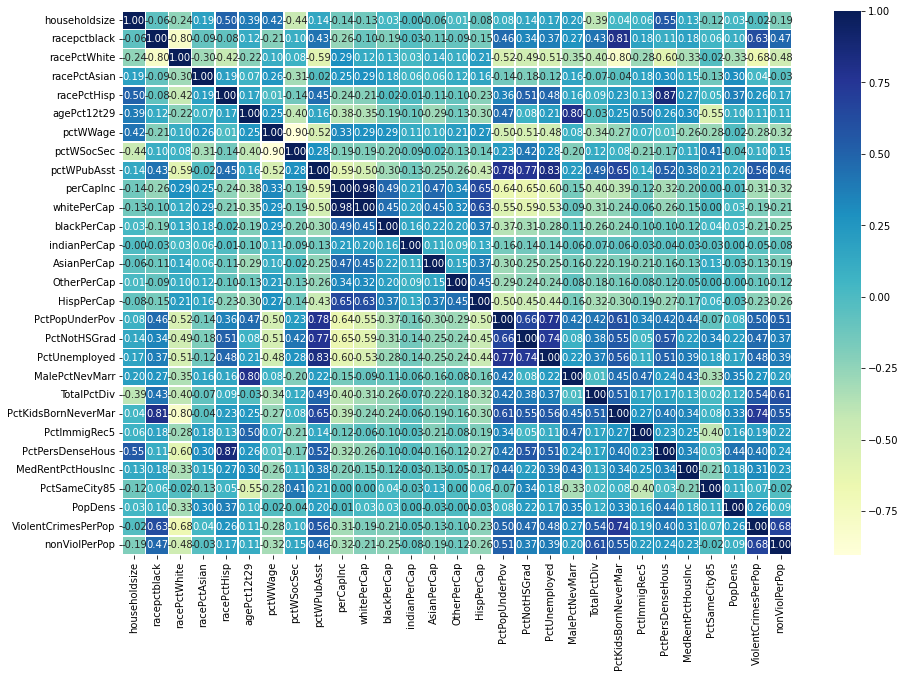

In [10]:
corr_matrix = df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr_matrix,
            annot=True,
            linewidths=0.5,
            fmt='.2f',
            cmap='YlGnBu');

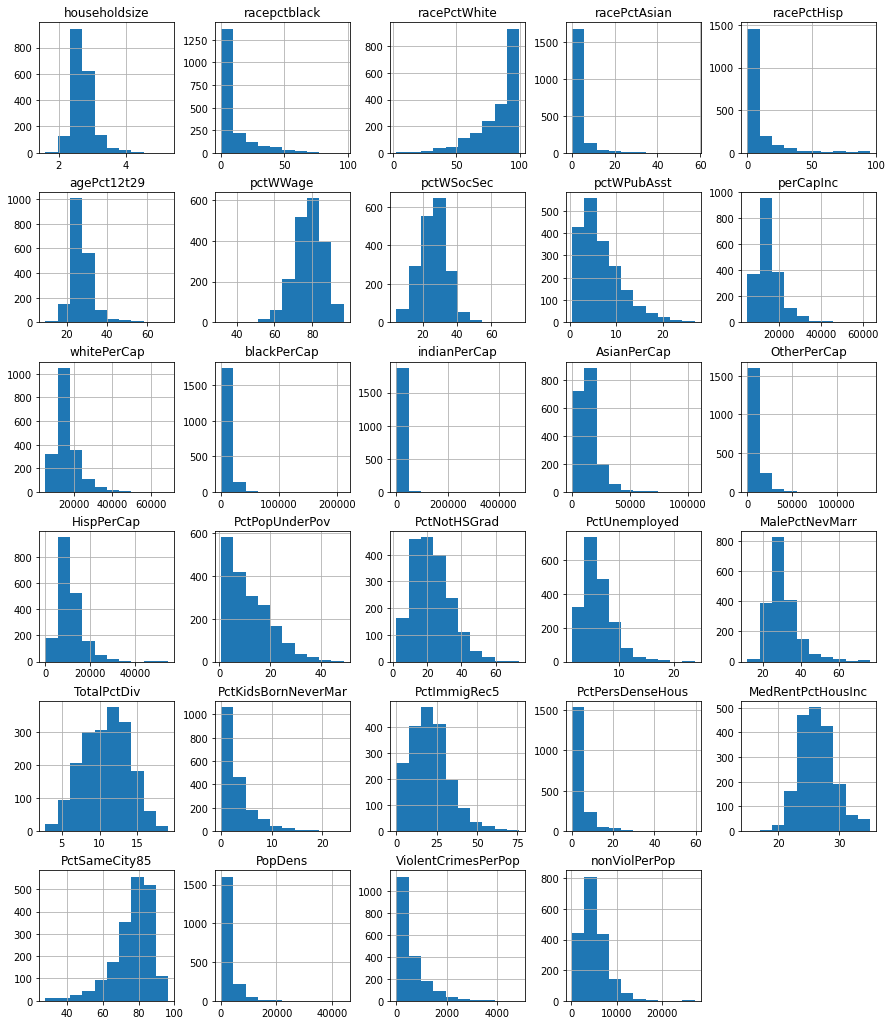

In [11]:
def show_hist(x):
    plt.rcParams["figure.figsize"] = 15,18
    x.hist()
show_hist(df)

### Log Transform the target variables--ViolentCrimesPerPop and nonViolPerPop

In [12]:
df['Ln_VCrime'] = np.log(df['ViolentCrimesPerPop'])
df['Ln_nVCrime'] = np.log(df['nonViolPerPop'])

#### Drop Violent and nonViolent Crimes variables

In [13]:
df.drop(['ViolentCrimesPerPop','nonViolPerPop'],axis=1,inplace=True)

### Perform a Baseline algorithm test

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X = df.drop(['Ln_VCrime','Ln_nVCrime'],axis=1)
y = df['Ln_nVCrime']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

### Import the algorithms

In [17]:
from sklearn.linear_model import LinearRegression,Lasso,ElasticNetCV,ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline 
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold


We standard the features because some of them are in percentage while some are in real numbers

In [18]:
pipelines =[]
pipelines.append(('ScalerLR',Pipeline([('Scaler',StandardScaler()),('Lr',LinearRegression())])))
pipelines.append(('ScalerLasso',Pipeline([('Scaler',StandardScaler()),('LASSO',Lasso())])))
pipelines.append(('ScalerEN',Pipeline([('Scaler',StandardScaler()),('EN',ElasticNet())])))
pipelines.append(('ScalerKnn',Pipeline([('Scaler',StandardScaler()),('KNN',KNeighborsRegressor())])))
pipelines.append(('ScalerRf',Pipeline([('Scaler',StandardScaler()),('RF',RandomForestRegressor())])))

results = []
names = []

for name,model in pipelines:
  kfold = KFold(n_splits=10)
  cv_results = cross_val_score(model,X_train,y_train,cv=kfold,scoring='neg_mean_squared_error')
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name,cv_results.mean(),cv_results.std())
  print(msg)

ScalerLR: -0.154098 (0.038381)
ScalerLasso: -0.335276 (0.048884)
ScalerEN: -0.335276 (0.048884)
ScalerKnn: -0.172971 (0.037560)
ScalerRf: -0.152467 (0.043657)


RandomForest Regressor seems to perform better than all the other algorithms, hence we focus on using Randomforest to build the final model

In [19]:
from sklearn.model_selection import GridSearchCV

In [20]:
from sklearn.feature_selection import SelectKBest,f_regression, VarianceThreshold

In [21]:
pipe = Pipeline([("std",StandardScaler()),
                 ("var",VarianceThreshold()),
                 ("selector",SelectKBest()),
                 ("regressor",RandomForestRegressor())])

params = [
          {"selector__k":[6,7,8,9,10,11,12,13,14]},
          {"regressor":[RandomForestRegressor()],
           "regressor__n_estimators":[10,100,200,1000],
          "regressor__max_features":['auto','sqrt','log2'],
           "regressor__max_depth":[2,3,4,5,6,7]}
]

In [22]:
grid = GridSearchCV(pipe,params,scoring='neg_mean_squared_error',cv=5)
Model_result = grid.fit(X_train, y_train)

In [23]:
best_est = Model_result.best_estimator_
print(best_est)

Pipeline(steps=[('std', StandardScaler()), ('var', VarianceThreshold()),
                ('selector', SelectKBest(k=14)),
                ('regressor', RandomForestRegressor())])


In [24]:
best_est.score(X_test,y_test)

0.5798138375912989

In [26]:
y_pred = Model_result.predict(X_test)
y_pred_tr = best_est.predict(X_train)
r_square = r2_score(y_train,y_pred_tr)
r_square

0.9323748441153882

In [27]:
r_square_test = r2_score(y_test,y_pred)
r_square_test

0.5798138375912989

In [28]:
col_after_var = X_train.columns[best_est['var'].get_support()]
mask_sel = best_est['selector'].get_support(indices=True)
final_feature_cols = col_after_var[mask_sel]

In [29]:
final_feature_cols

Index(['racepctblack', 'racePctWhite', 'racePctAsian', 'racePctHisp',
       'agePct12t29', 'pctWPubAsst', 'perCapInc', 'whitePerCap',
       'PctPopUnderPov', 'MalePctNevMarr', 'TotalPctDiv',
       'PctKidsBornNeverMar', 'PctPersDenseHous', 'PopDens'],
      dtype='object')

In [30]:
coef = Model_result.best_estimator_.named_steps['regressor'].feature_importances_
importance = np.abs(coef)
importance

array([0.04015851, 0.05860437, 0.0256236 , 0.03619961, 0.04108656,
       0.030938  , 0.0201021 , 0.02916315, 0.24727069, 0.03179994,
       0.27353836, 0.06045644, 0.05103964, 0.05401903])

### Combine the dataframe to know the shortlisted features

In [31]:
combination = pd.Series(importance,final_feature_cols)
combination

racepctblack           0.040159
racePctWhite           0.058604
racePctAsian           0.025624
racePctHisp            0.036200
agePct12t29            0.041087
pctWPubAsst            0.030938
perCapInc              0.020102
whitePerCap            0.029163
PctPopUnderPov         0.247271
MalePctNevMarr         0.031800
TotalPctDiv            0.273538
PctKidsBornNeverMar    0.060456
PctPersDenseHous       0.051040
PopDens                0.054019
dtype: float64

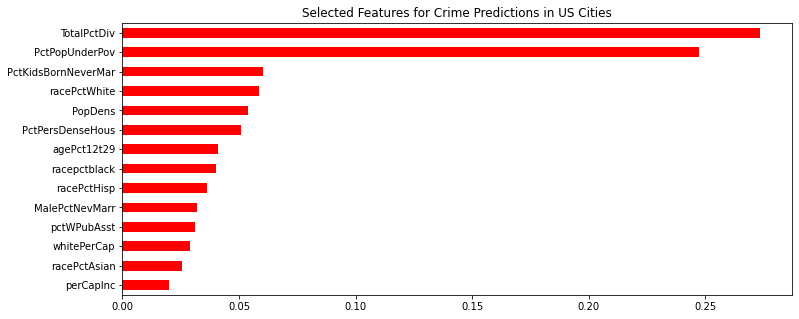

In [32]:
combination.sort_values().plot.barh(color='red',figsize=(12,5))
plt.title("Selected Features for Crime Predictions in US Cities");

This model identified Total Percentage of People divorced as the number 1 predictor of crimes in the US communities.  This was followed by the proportion of the population below poverty line.  Again, the proportion of kids born to never married parents influences crime rates.  Other factors include population density,percent of persons in dense housing (more than 1 person per room),proprotion of people between age 12 and 29 living in the neighborhood respectively.

### Conclusion

There is a need for government to look into how to strengthen families becuase, it seems the major cause of crimes as identified from this exercise is a dysfunctional family.